In [170]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [171]:
df=pd.read_csv('671009038_T_ONTIME_REPORTING.csv',parse_dates=['FL_DATE'],index_col=['ORIGIN'],nrows=1000000)
df.shape

(1000000, 19)

In [172]:
a=df.loc[df.groupby("ORIGIN").size()>df.groupby("ORIGIN").size().quantile(0.01)]
a.shape

(999920, 19)

In [173]:
b=a.groupby('ORIGIN').size()
b.head(3)



ORIGIN
ABE     604
ABI     290
ABQ    2945
dtype: int64

In [174]:
c=a.loc[a['DEP_DELAY']<0].groupby('ORIGIN').size()
c.head(3)

ORIGIN
ABE     366
ABI     206
ABQ    1863
dtype: int64

In [175]:
d=a.groupby('ORIGIN').agg({"DEP_DELAY": [np.mean, np.median]})
d['pr']=c/b
d.head(3)

DEP_DELAY               pr
             mean median          
ORIGIN                            
ABE     12.382353   -3.0  0.605960
ABI      3.993056   -5.0  0.710345
ABQ      6.649256   -3.0  0.632598

In [176]:
d=d.sort_values(by=('DEP_DELAY','mean'),ascending=False)
d.head(5)

DEP_DELAY               pr
             mean median          
ORIGIN                            
JMS     74.053030   -6.0  0.548611
MEI     68.000000    0.0  0.471698
DVL     56.435294   -7.0  0.593407
APN     55.421053   -1.0  0.439560
IMT     51.452632   -5.0  0.565657

In [177]:
df1=df.reset_index()
df1.head(3)

,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
0,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df1=df1.set_index('TAIL_NUM')
df1.head(3)

,ORIGIN,FL_DATE,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
TAIL_NUM,,,,,,,,,,,,,,,,,,,
N8974C,AVL,2019-01-01,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
N922XJ,JFK,2019-01-01,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
N326PQ,CLE,2019-01-01,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df1a=df1.groupby('TAIL_NUM').size()
df1a.head(3)

TAIL_NUM
215NV    187
216NV    164
217NV    201
dtype: int64

In [180]:
df1b=df1.loc[df1.DEP_DELAY<0].groupby('TAIL_NUM').size()
df1b.head(3)

TAIL_NUM
215NV    127
216NV    104
217NV    133
dtype: int64

In [181]:
df2=df1.groupby('TAIL_NUM').agg({"DEP_DELAY": [np.mean, np.median]})
df2['pr']=df1b/df1a
df2.head(100)

DEP_DELAY               pr
               mean median          
TAIL_NUM                            
215NV      0.828877   -4.0  0.679144
216NV      4.128049   -4.5  0.634146
217NV      1.721393   -5.0  0.661692
218NV     14.931818    0.0  0.443182
219NV      2.064000   -3.0  0.608000
...             ...    ...       ...
N104HQ     1.815574   -4.0  0.740891
N104NN     5.849057   -4.0  0.738318
N104UW     1.366492   -3.0  0.697917
N10575     9.524390   -5.0  0.772000
N105HQ    -0.485714   -5.0  0.750000

[100 rows x 3 columns]

In [182]:
df2=df2.sort_values(by=('DEP_DELAY','mean'),ascending=False)
df2.head(5)

DEP_DELAY           pr
              mean median      
TAIL_NUM                       
N656YX       486.0  486.0   NaN
N718AN       190.5  163.0   NaN
N2243U       165.5  165.5   NaN
N770AN       152.5   14.0  0.25
N2136U       139.0  139.0   NaN

In [183]:
dis=df.groupby('ORIGIN').size()
dis.max()

53272

<AxesSubplot:>

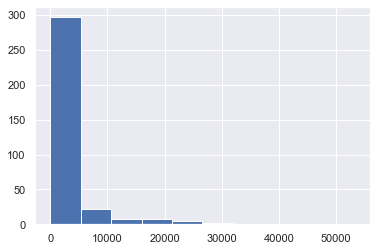

In [184]:
h=dis.hist(bins=10)
h

In [185]:
df['month']=df["FL_DATE"].dt.month
df4=df.reset_index()
df4=df4.set_index('month')
df4.head(3)

,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
month,,,,,,,,,,,,,,,,,,,,
1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df4['delayed']=0
df4.head(3)

,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,delayed
month,,,,,,,,,,,,,,,,,,,,,
1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [187]:
df4.loc[df4.DEP_DELAY<0,'delayed']=1
df4.head(3)


,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,delayed
month,,,,,,,,,,,,,,,,,,,,,
1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [188]:
df4.head(25)

,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,delayed
month,,,,,,,,,,,,,,,,,,,,,
1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BHM,2019-01-01,N135EV,9E,"Birmingham, AL",ATL,"Atlanta, GA",1059.0,-1.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,GTF,2019-01-01,N914XJ,9E,"Great Falls, MT",MSP,"Minneapolis, MN",1057.0,-3.0,1418.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,GRB,2019-01-01,N924EV,9E,"Green Bay, WI",DTW,"Detroit, MI",855.0,0.0,1125.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,AGS,2019-01-01,N195PQ,9E,"Augusta, GA",ATL,"Atlanta, GA",800.0,-5.0,900.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,CLT,2019-01-01,N319PQ,9E,"Charlotte, NC",JFK,"New York, NY",1350.0,-10.0,1534.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,MEM,2019-01-01,N933XJ,9E,"Memphis, TN",MSP,"Minneapolis, MN",1441.0,-4.0,1641.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1


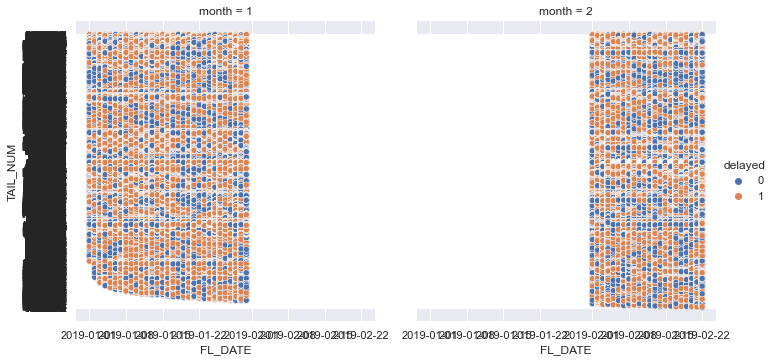

In [189]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,20)})
sns.relplot(x="FL_DATE", y="TAIL_NUM",
            hue="delayed",col='month',
            data=df4)
sns.despine(left=True)

In [190]:
df4['comb']=df4['ORIGIN_CITY_NAME']+"-"+df4['DEST_CITY_NAME']
df4.head(3)

,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,delayed,comb
month,,,,,,,,,,,,,,,,,,,,,
1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,1758.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"Asheville, NC-Atlanta, GA"
1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,1255.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"New York, NY-Raleigh/Durham, NC"
1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,1417.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"Cleveland, OH-Detroit, MI"


In [191]:
df4=df4.reset_index()
df4.head(3)

,month,ORIGIN,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,delayed,comb
0,1,AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,-7.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"Asheville, NC-Atlanta, GA"
1,1,JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,-8.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"New York, NY-Raleigh/Durham, NC"
2,1,CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,-7.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,"Cleveland, OH-Detroit, MI"


In [196]:
df4=df4.reset_index()
df4=df4.set_index(['comb'])[['TAIL_NUM','DEP_DELAY']]
df4.head(30)

,TAIL_NUM,DEP_DELAY
comb,,
"Asheville, NC-Atlanta, GA",N8974C,-7.0
"New York, NY-Raleigh/Durham, NC",N922XJ,-8.0
"Cleveland, OH-Detroit, MI",N326PQ,-7.0
"Birmingham, AL-Atlanta, GA",N135EV,-1.0
"Great Falls, MT-Minneapolis, MN",N914XJ,-3.0
"Green Bay, WI-Detroit, MI",N924EV,0.0
"Augusta, GA-Atlanta, GA",N195PQ,-5.0
"Charlotte, NC-New York, NY",N319PQ,-10.0
"Memphis, TN-Minneapolis, MN",N933XJ,-4.0


In [197]:
df5=df4.groupby(['comb']).agg({'TAIL_NUM':'first','DEP_DELAY':'max'})
df5.head(3)

,TAIL_NUM,DEP_DELAY
comb,,
"Aberdeen, SD-Minneapolis, MN",N910EV,481.0
"Abilene, TX-Dallas/Fort Worth, TX",N825AE,453.0
"Adak Island, AK-Anchorage, AK",N614AS,21.0
